In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 634


In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
     
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
     
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        
           # Append the City information into city_data list
        city_data.append({"City": city, 
                        "Lat": city_lat, 
                        "Lng": city_lng, 
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
       

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | buala
Processing Record 2 of Set 1 | praia
Processing Record 3 of Set 1 | krasnoselkup
Processing Record 4 of Set 1 | busselton
Processing Record 5 of Set 1 | pangnirtung
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | norman wells
Processing Record 10 of Set 1 | vaini
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | komsomolskiy
Processing Record 13 of Set 1 | atuona
Processing Record 14 of Set 1 | saskylakh
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | oistins
Processing Record 17 of Set 1 | aljezur
Processing Record 18 of Set 1 | east northport
Processing Record 19 of Set 1 | evanston
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | comodoro rivadavia
Processing Record 22 of Set 1 | kochki
Processing Record 23 of Se

In [6]:
import json 
print(json.dumps(city_weather, indent=4, sort_keys=False))


{
    "coord": {
        "lon": -119.2781,
        "lat": 47.1301
    },
    "weather": [
        {
            "id": 804,
            "main": "Clouds",
            "description": "overcast clouds",
            "icon": "04d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 11.05,
        "feels_like": 9.52,
        "temp_min": 11.05,
        "temp_max": 11.05,
        "pressure": 1001,
        "humidity": 50,
        "sea_level": 1001,
        "grnd_level": 963
    },
    "visibility": 10000,
    "wind": {
        "speed": 3.37,
        "deg": 133,
        "gust": 6.12
    },
    "clouds": {
        "all": 99
    },
    "dt": 1681783198,
    "sys": {
        "type": 2,
        "id": 2004708,
        "country": "US",
        "sunrise": 1681736724,
        "sunset": 1681786053
    },
    "timezone": -25200,
    "id": 5803990,
    "name": "Moses Lake",
    "cod": 200
}


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          587
Lat           587
Lng           587
Max Temp      587
Humidity      587
Cloudiness    587
Wind Speed    587
Country       587
Date          587
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,buala,-8.1450,159.5921,29.29,60,89,0.33,SB,1681783475
1,praia,14.9215,-23.5087,23.30,73,20,8.75,CV,1681783476
2,krasnoselkup,65.7000,82.4667,-13.21,85,100,2.56,RU,1681783476
3,busselton,-33.6500,115.3333,17.85,50,0,4.84,AU,1681783155
4,pangnirtung,66.1451,-65.7125,-19.51,89,69,3.11,CA,1681783476


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.1450,159.5921,29.29,60,89,0.33,SB,1681783475
1,praia,14.9215,-23.5087,23.30,73,20,8.75,CV,1681783476
2,krasnoselkup,65.7000,82.4667,-13.21,85,100,2.56,RU,1681783476
3,busselton,-33.6500,115.3333,17.85,50,0,4.84,AU,1681783155
4,pangnirtung,66.1451,-65.7125,-19.51,89,69,3.11,CA,1681783476


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

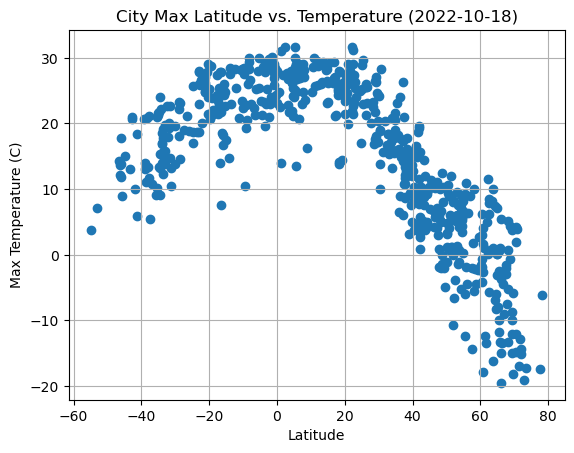

In [11]:
# Build scatter plot for latitude vs. temperature
x = city_data_df['Lat']
y = city_data_df['Max Temp']
plt.scatter(x, y)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

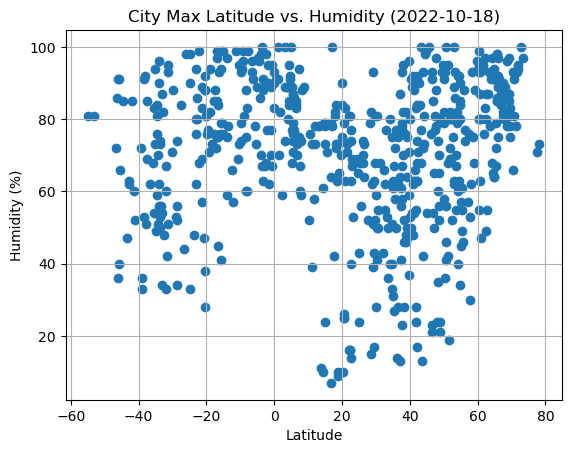

In [12]:
# Build scatter plot for latitude vs. humidity
x = city_data_df['Lat']
y = city_data_df['Humidity']
plt.scatter(x, y)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

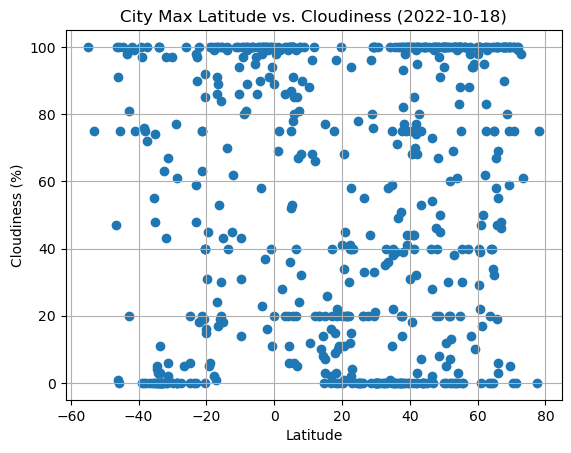

In [13]:
# Build scatter plot for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Cloudiness']
plt.scatter(x, y)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

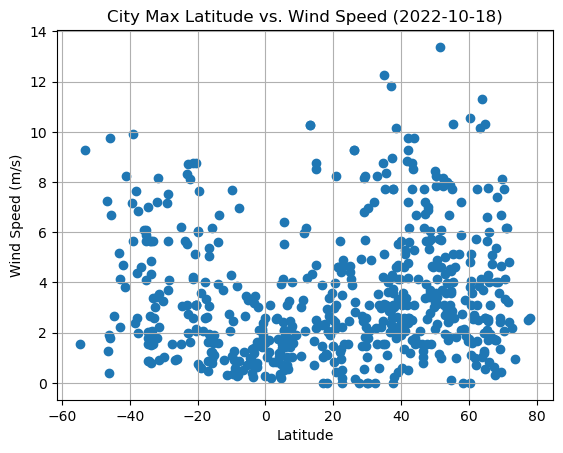

In [14]:
# Build scatter plot for latitude vs. cloudiness
x = city_data_df['Lat']
y = city_data_df['Wind Speed']
plt.scatter(x, y)
# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship

In [15]:
# Define a function to create Linear Regression plots
def scatter_plot(x, y, coord):
    
    #linear regression
    (pe_slope, pe_int, rvalue, pe_p, pe_std_err) = st.linregress(x, y)
    pe_fit = pe_slope * x + pe_int
    line_eq = "y = " + str(round(pe_slope,2)) + "x + " + str(round(pe_int,2))
    
    
    # Create a scatter plot
    plt.scatter(x, y, marker="o", facecolors="blue", edgecolors="black")

    
    # Add linear model
    plt.plot(x, pe_fit, "r-") #linewidth=1.5, color="tomato")
    plt.annotate(line_eq,coord,fontsize=15,color="red") 
    return rvalue
   

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,praia,14.9215,-23.5087,23.30,73,20,8.75,CV,1681783476
2,krasnoselkup,65.7000,82.4667,-13.21,85,100,2.56,RU,1681783476
4,pangnirtung,66.1451,-65.7125,-19.51,89,69,3.11,CA,1681783476
5,tasiilaq,65.6145,-37.6368,0.65,98,100,7.75,GL,1681783146
6,qaanaaq,77.4840,-69.3632,-17.33,71,0,2.49,GL,1681783156


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,buala,-8.145,159.5921,29.29,60,89,0.33,SB,1681783475
3,busselton,-33.650,115.3333,17.85,50,0,4.84,AU,1681783155
9,vaini,-21.200,-175.2000,26.09,89,75,4.12,TO,1681783166
10,ushuaia,-54.800,-68.3000,3.81,81,100,1.54,AR,1681783049
12,atuona,-9.800,-139.0333,27.57,79,14,7.68,PF,1681783154


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:0.7879083592293226.


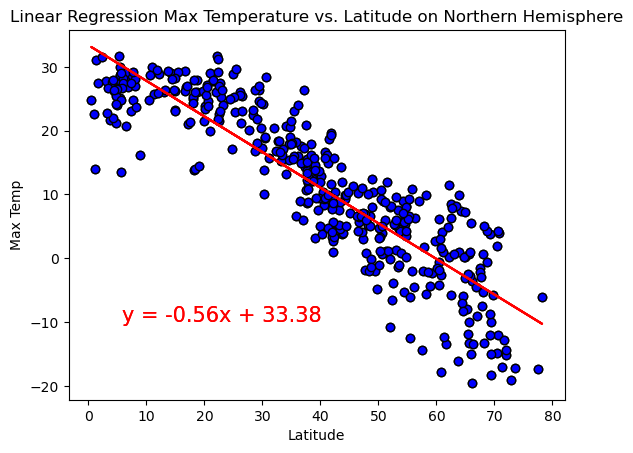

In [18]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
coord = (5.8, -10)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Max Temperature vs. Latitude on Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Save the figure
plt.savefig("../output_data/Fig5.png")
plt.show()

The r-value is:0.5025028266231611.


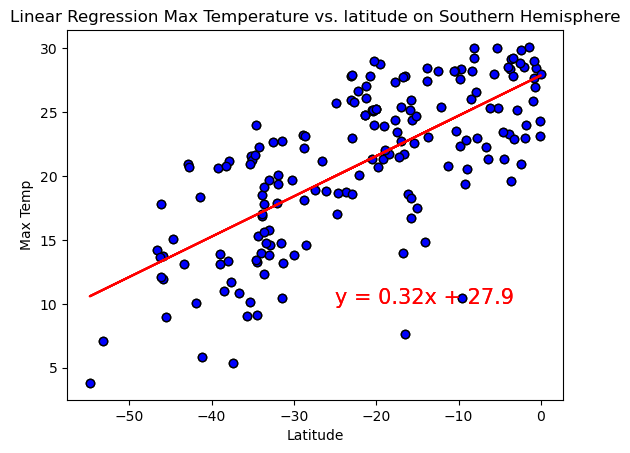

In [19]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
coord = (-25, 10)
#coord = southern_hemi_df["Lat", "Long"]
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Max Temperature vs. latitude on Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")


# Save the figure
plt.savefig("../output_data/Fig6.png")
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, there is a negative correlation while in the southern, there is a positive correlation when comparing the relationships between max temp and latitude. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.0264712937673307.


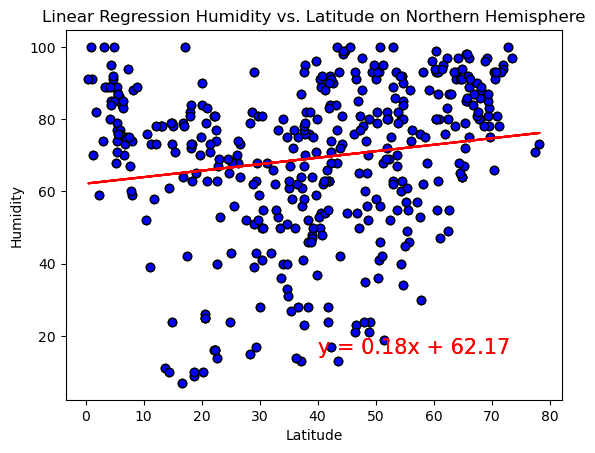

In [20]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
coord = (40, 15)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Humidity vs. Latitude on Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("../output_data/Fig7.png")
plt.show()

The r-value is:0.12443468046515672.


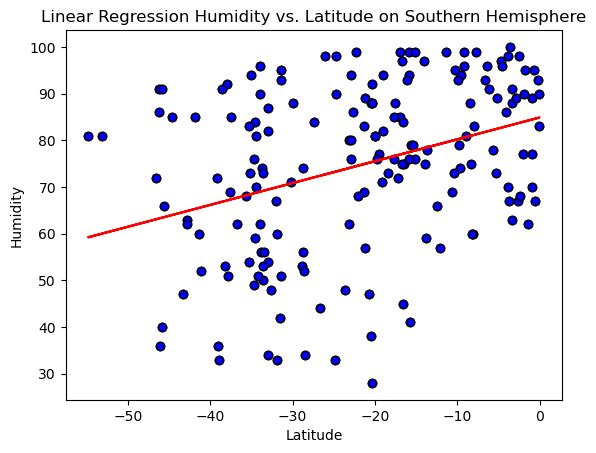

In [21]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
coord = (-50, 20)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Humidity vs. Latitude on Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Humidity")


# Save the figure
plt.savefig("../output_data/Fig8.png")
plt.show()

**Discussion about the linear relationship:** 
There's a slightly positive correlation between humidity and latitude in both northern and southern hemispheres; moreso in the north than the south. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.034268587753474154.


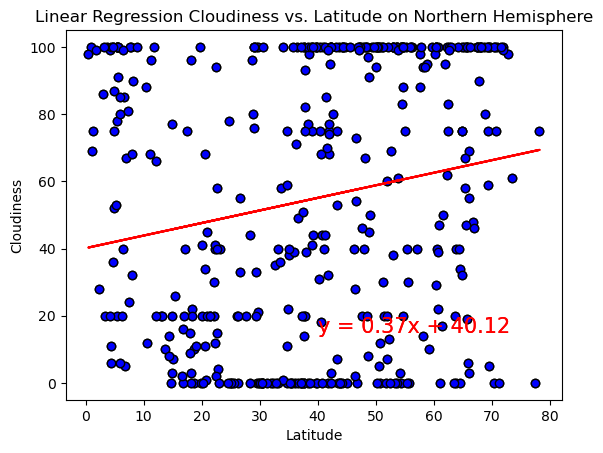

In [22]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
coord = (40, 15)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Cloudiness vs. Latitude on Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig9.png")
plt.show()

The r-value is:0.09877217456477583.


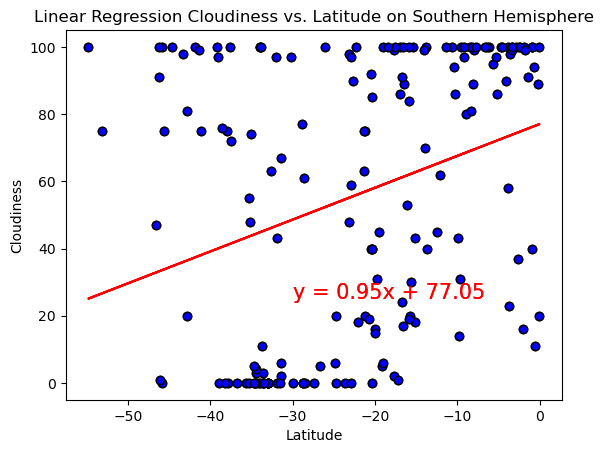

In [23]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
coord = (-30, 25)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Cloudiness vs. Latitude on Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig10.png")
plt.show()

**Discussion about the linear relationship:** 
There is no correlation between cloudiness and latitude in the northern hemisphere; while in the south, there may be a slight positive correlation, but the points are very much scattered as well. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.03839129498083949.


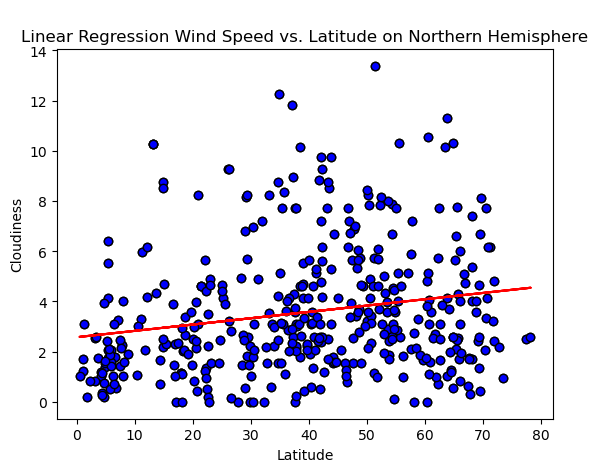

In [24]:
# Northern Hemisphere
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
coord = (40, 15)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Wind Speed vs. Latitude on Northern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig11.png")
plt.show()

The r-value is:0.15441882970751025.


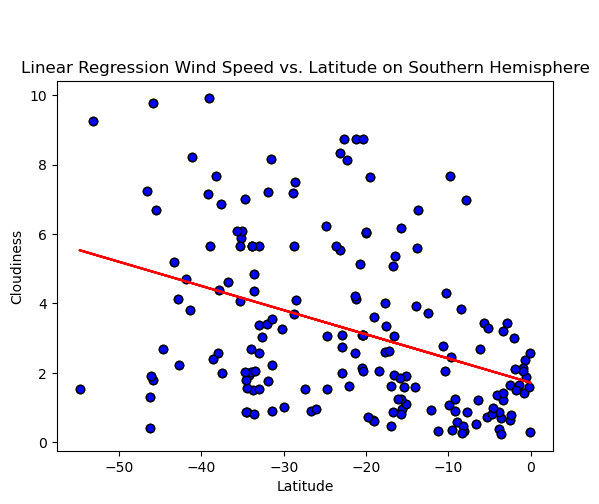

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
coord = (-50, 12)
rvalue = scatter_plot(x,y, coord)
print(f'The r-value is:{rvalue**2}.')

scatter_plot(x, y, coord)

# Incorporate the other graph properties
plt.title("Linear Regression Wind Speed vs. Latitude on Southern Hemisphere")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")


# Save the figure
plt.savefig("../output_data/Fig11.png")
plt.show()

**Discussion about the linear relationship:** 
There is no relationship in the northern hemisphere when it comes to wind speed and latitiude; however, there is a slight negative correlation in the southern hemisphere. 